In [1]:
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [3]:
train = "train_data.txt"
train_data = pd.read_csv(train, sep=':::', names=['Title', 'Genre', 'Description'], engine='python')

In [4]:
train_data.describe()

,Title,Genre,Description
count,54214,54214,54214
unique,54214,27,54086
top,Oscar et la dame rose (2009),drama,Grammy - music award of the American academy ...
freq,1,13613,12


In [5]:
train_data.isnull().sum()

Title          0
Genre          0
Description    0
dtype: int64

In [6]:
test = "test_data.txt"
test_data = pd.read_csv(test, sep=':::', names=['Id', 'Title', 'Description'], engine='python')


Genres Distribution in Train Data:


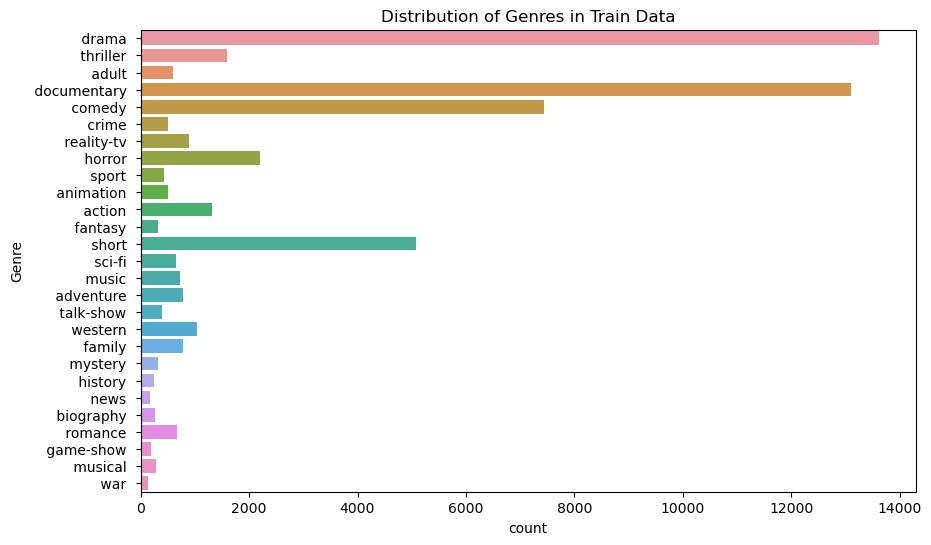

In [7]:
print("\nGenres Distribution in Train Data:")
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=train_data)
plt.title('Distribution of Genres in Train Data')
plt.show()

In [8]:
def preprocess_text(text):
    text = text.lower()
    text = re.sub(r"[^a-zA-Z\s]", "", text)
    text = re.sub(r"\s+", " ", text)
    return text

In [9]:
train_data["Description"] = train_data["Description"].apply(preprocess_text)

In [10]:
tfidf_vectorizer = TfidfVectorizer(max_features=1000)
X_train_sparse = tfidf_vectorizer.fit_transform(train_data["Description"])
y_train = train_data["Genre"]

In [11]:
svm_classifier = SVC(kernel='linear', C=1.0, verbose=True)
svm_classifier.fit(X_train_sparse, y_train)

[LibSVM]

SVC(kernel='linear', verbose=True)

In [12]:
test_data["Description"] = test_data["Description"].apply(preprocess_text)
X_test_sparse = tfidf_vectorizer.transform(test_data["Description"])
y_pred = svm_classifier.predict(X_test_sparse)

In [13]:
test_solution = "test_data_solution.txt"
test_data_solution = pd.read_csv(test_solution, sep=':::', names=['Id', 'Genre'], engine='python')

In [ ]:
cm = confusion_matrix(test_data_solution["Genre"], y_pred)
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=svm_classifier.classes_, yticklabels=svm_classifier.classes_)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()